In [1]:
#Hidden
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import pandas as pd

## Just for reference, since datasience is evolving rapidly
import datascience as ds
ds.__version__

'0.5.19'

# Recap of some themes covered


We start with a recap of hypothesis testing, and move to some observations that matter for historical thinking -- bunching in years recorded and unusual outliers.

/I/ AB Testing

/II/ Themes Covered

## /I/ AB Testing, recap

We will return to the slavery data from the start of the semester, and how much we have learned. The codebook is at: http://www.icpsr.umich.edu/icpsrweb/RCMD/studies/7423 , and you also have a copy in Bcourses. 


In [2]:
data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data1.csv")

Recall that some records contain multiple entries and, to simplify, we examined only a subgroup, where prices are known and refer to individual records: 

In [3]:
data = data.where(data["V14"] != 99999)
data = data.where(data["V12"] == 1)
data = data.where(data["V40"]!=9)
data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47
NO2,NB,2,1804,PG,VI,1,999,GA,9,999,1,1,350,1,11,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,201,1,1
NO2,NB,3,1804,PG,BI,1,999,CO,1,999,1,1,1000,1,24,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,9999,2,99,1,99,0,0,0,503,1,2
NO2,NB,3,1804,P,LA,1,999,DC,9,999,1,1,450,2,25,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,210,10,99,2,42,0,0,0,503,1,3
NO2,NB,10,1804,PG,PE,1,999,LE,9,999,1,1,400,2,20,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,503,1,6
NO2,PP,1,1804,PG,GA,1,999,MO,9,999,1,1,750,1,22,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,9999,99,99,1,99,2,0,0,267,1,7
NO2,PP,1,1804,PG,PO,1,999,BO,1,999,1,1,500,2,21,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,30,0,0,0,267,1,8
NO2,PP,2,1804,PG,CR,1,999,LA,2,SLO,1,1,200,2,2.5,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,999,1,11
NO2,PP,3,1804,PG,ME,1,999,MA,9,999,1,1,450,2,14,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,7,8,117,1,12
NO2,PP,3,1804,PG,AR,1,999,CH,1,999,1,1,360,2,11,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,42,0,0,0,503,1,13
NO2,PP,3,1804,PG,CH,2,SLO,GI,2,SLO,1,1,350,1,18,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,7,8,117,1,14


Also, we will restrict data to a single year so that we can easily check the real value (or labor value, labor value, or income value; here is the web-site where we can check these figures:  https://www.measuringworth.com/uscompare/) 

Prices of cotton tended to rise after the 1840s, so we can look at 1850. You can look at some other year, and recall that prices were very high after the War of 1812 and in the 1830s due to a boom in land prices (“internal improvements”); in contrast, the “Panic of 1837” had the opposite effect on prices.
Keep in mind the following values:

“If you want to compare the value of a $1.00 Commodity in 1850 there are three choices. 
In 2014 the relative:

/1/ real price of that commodity is \$31.30

/2/ labor value of that commodity is \$223.30 (using the unskilled wage) or \$482.00 (using production worker compensation)

/3/ income value of that commodity is \$490.00”

## Your turn

Now Calculate the mean price for 1850, and express it in 2014 dollars.

In [4]:
#sort gender where now male = 0, female = 1 for future AB test
new_gender = []
for i in data["V15"]:
    new_gender.append(i - 1)
data.append_column("V15_new", new_gender)

#sort status where now 0=Guarantee; 1=Unguaranteed and drop all 9 value for future AB test
data = data.where(data["V40"]!=99)
new_status = []
for a in data["V40"]:
    new_status.append(a - 1)
data.append_column("V40_new", new_status)

#Do not define data1850 before modifying the original data, otherwise data1850 would not have column "V15_new"
data1850 = data.where(data["V4"] == 1850)
data1851 = data.where(data["V4"] == 1851)
data1852 = data.where(data["V4"] == 1852)

In [5]:
data1850

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V15_new,V40_new
NO2,AC,1,1850,999,TO,3,KTY,GI,1,999,1,1,375,2,8,2,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,99,1,3,115,1,3628,1,0
NO2,AC,4,1850,999,PA,1,999,GE,1,999,1,1,500,2,16,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,9999,36,99,1,99,0,0,0,267,1,3629,1,0
NO2,AC,4,1850,999,WT,1,999,PA,1,999,1,1,800,2,27,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,22,0,0,0,267,1,3630,1,1
NO2,AC,4,1850,999,DE,1,999,LA,1,999,1,1,600,2,19,2,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,4,0,0,0,267,1,3631,1,1
NO2,AC,5,1850,999,TR,1,999,LA,1,999,1,1,375,2,13.5,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,267,1,3633,1,0
NO2,AC,6,1850,999,PE,1,999,LA,1,999,1,1,500,1,15,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,932,1,3634,0,1
NO2,AC,6,1850,999,CO,1,999,CR,1,999,1,1,465,2,16,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,7,0,0,267,1,3635,1,0
NO2,AC,11,1850,999,WG,1,999,DE,1,999,1,1,400,2,16,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,932,1,3637,1,0
NO2,AC,12,1850,999,CH,1,999,DM,1,999,1,1,500,2,37,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,267,1,3638,1,1
NO2,AB,1,1850,999,MO,2,WBR,BB,2,WBR,1,1,350,1,26,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,267,1,3639,0,1


In [6]:
"""Bootstrap A/B test for the difference in the mean response
Assumes A=0, B=1"""

def bootstrap_AB_test(samp_table, response_label, ab_label, repetitions):
    
    # Sort the sample table according to the A/B column; 
    # then select only the column of effects.
    response = samp_table.sort(ab_label).select(response_label)
    
    # Find the number of entries in Category A.
    n_A = samp_table.where(samp_table[ab_label],0).num_rows
      
    # Calculate the observed value of the test statistic.
    meanA = np.mean(response[response_label][:n_A])
    meanB = np.mean(response[response_label][n_A:])
    obs_diff = meanA - meanB
    
    # Run the bootstrap procedure and get a list of resampled differences in means
    diffs = []
    for i in range(repetitions):
        resample = response.sample(with_replacement=True)
        d = np.mean(resample[response_label][:n_A]) - np.mean(resample[response_label][n_A:])
        diffs.append([d])
    
    # Compute the bootstrap empirical P-value
    diff_array = np.array(diffs)
    p_value = np.count_nonzero(abs(diff_array) >= abs(obs_diff))/repetitions
    
    # Display results
    diffs = Table([diffs],['diff_in_means'])
    diffs.hist(bins=20,normed=True)
    plots.xlabel('Approx null distribution of difference in means')
    plots.title('Bootstrap A-B Test')
    print("Observed difference in means: ", obs_diff)
    print("Bootstrap empirical P-value: ", p_value)

### /1/ Does gender seem to matter?

Let's use the bootstrap to see the difference between recorded prices for the recorded genders.

C:\Users\Anon\Anaconda3\lib\site-packages\datascience\tables.py:49: FutureWarning: Two-argument __init__ is deprecated. Use Table().with_columns(...)
  warnings.warn("Two-argument __init__ is deprecated. Use Table().with_columns(...)", FutureWarning)


Observed difference in means:  17.2921146953
Bootstrap empirical P-value:  0.6315


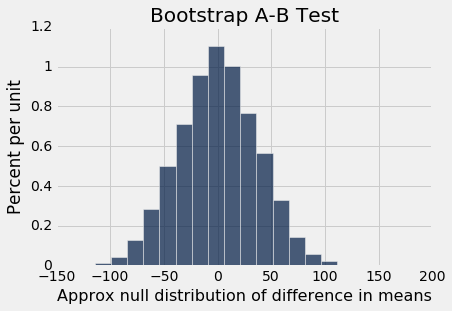

In [8]:
bootstrap_AB_test(data1850, "V14","V15_new", 10000)

### /2/ Does the sale status seem to matter?

Let's see if having a guarantee matters in terms of a recorded price. We will have to look at the codebook, and let's note that several versions of the codebook exist -- you might note that word choice, sex, and that we might see gender instead these days.


C:\Users\Anon\Anaconda3\lib\site-packages\datascience\tables.py:49: FutureWarning: Two-argument __init__ is deprecated. Use Table().with_columns(...)
  warnings.warn("Two-argument __init__ is deprecated. Use Table().with_columns(...)", FutureWarning)


Observed difference in means:  151.368845501
Bootstrap empirical P-value:  0.0004


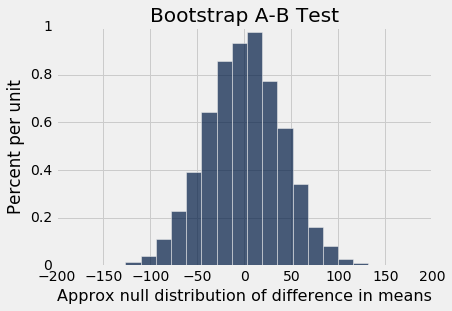

In [9]:
bootstrap_AB_test(data1850, "V14","V40_new", 10000)

### /3/ Does the year matter?

Try the other years, 1851 and 1852, and see what result you get. What do you notice?

C:\Users\Anon\Anaconda3\lib\site-packages\datascience\tables.py:49: FutureWarning: Two-argument __init__ is deprecated. Use Table().with_columns(...)
  warnings.warn("Two-argument __init__ is deprecated. Use Table().with_columns(...)", FutureWarning)


Observed difference in means:  197.766124171
Bootstrap empirical P-value:  0.0007


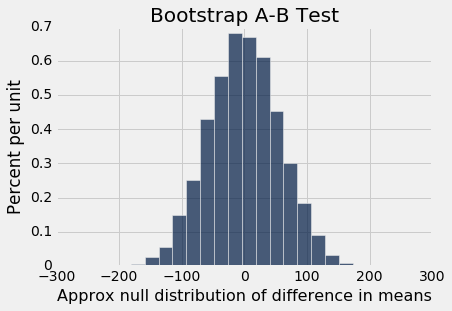

In [10]:
#Your turn 
#For 1851, your turn
#bootstrap_AB_test(..)

bootstrap_AB_test(data1852, "V14","V40_new", 10000)

C:\Users\Anon\Anaconda3\lib\site-packages\datascience\tables.py:49: FutureWarning: Two-argument __init__ is deprecated. Use Table().with_columns(...)
  warnings.warn("Two-argument __init__ is deprecated. Use Table().with_columns(...)", FutureWarning)


Observed difference in means:  107.377149877
Bootstrap empirical P-value:  0.1995


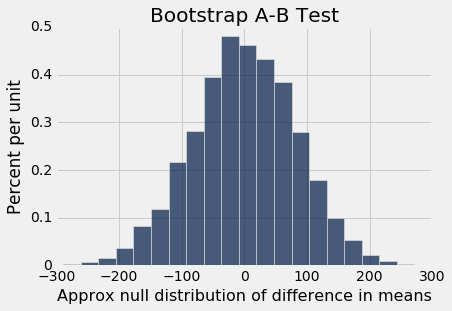

In [11]:
bootstrap_AB_test(data1851, "V14","V40_new", 10000)

In [12]:
data1851

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V15_new,V40_new
NO2,AB,2,1851,999,TR,2,SMA,LA,1,999,1,1,500,2,19,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,292,1,3817,1,0
NO2,AB,2,1851,999,HA,1,999,BO,2,MOR,1,1,1062,1,21,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,3,9,181,1,3818,0,0
NO2,AB,3,1851,999,FO,1,999,CR,1,999,1,1,525,2,19,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,2,0,0,0,267,1,3819,1,1
NO2,AB,3,1851,999,BU,1,999,HA,1,999,1,1,625,2,29,2,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,267,1,3820,1,0
NO2,AB,4,1851,999,BO,1,999,LA,2,RAP,1,1,1180,1,20,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,550,8,99,1,99,0,3,9,181,1,3821,0,0
NO2,AB,5,1851,999,GE,1,999,AU,1,999,1,1,700,1,24,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,2,0,0,267,1,3823,0,0
NO2,AB,6,1851,999,RO,1,999,PI,1,999,1,1,265,2,40,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,267,1,3827,1,1
NO2,AB,7,1851,999,MA,1,999,WO,1,999,1,1,650,2,21,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,267,1,3828,1,0
NO2,AB,10,1851,999,TH,1,999,BR,2,STA,1,1,900,1,27,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,5,0,0,267,1,3829,0,0
NO2,AB,10,1851,999,BO,1,999,BO,1,999,1,1,900,1,27,2,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,267,1,3833,0,0


## /II/ Let's look at some of what we've covered over the semester

/1/ In visualizing the data, we noted recorded sales peaked in some years -- a start of a temporal approach, or way of thinking. 

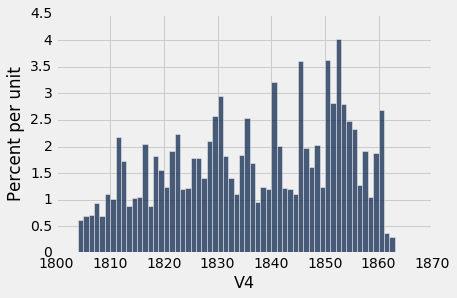

In [13]:
#Another way to present the information is in percent format
data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data1.csv")
viz_salesbyyear = data.select(["V4"])
viz_salesbyyear.hist(bins=np.arange(1800, 1870, 1), normed=True)

/2/ We noted a pretty normal distribution.... ONCE we excluded some of the messy values, the 99999s

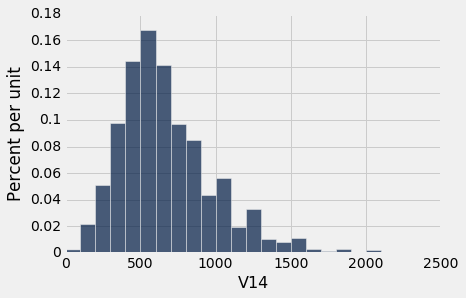

In [14]:
PriceRecorded=data.where(data["V14"] != 99999)
SingularRecord=PriceRecorded.where(np.logical_and(PriceRecorded.column('V12')==1, 
                                                PriceRecorded.column('V13')==1))
SingularRecord.sort('V14', descending=True)
SingularRecord.hist('V14', bins=np.arange(0,2501, 100))

/3/ We noted an interesting phenomenon with age, and the selectivity of records. Also, would you rewrite this code?

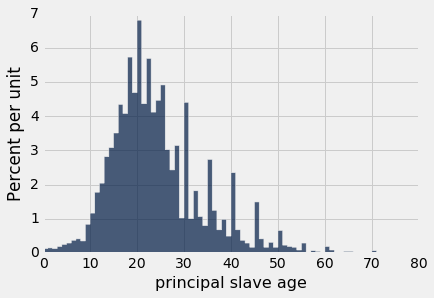

In [15]:
data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data1.csv")
data.relabel('V16', 'principal slave age')
principal_age = data.where(data.column("principal slave age") !=99).column("principal slave age")
my_bins=np.arange(np.min(principal_age), np.max(principal_age)+2, 1)
data.hist("principal slave age", bins=my_bins)

/4/ And we noted -- an outlier. 

In [21]:
data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data4.csv")
data

COUNTY,PARISH,RELIEF,INCOME,UNEMP,COTTIND,ALLOTMNT,LONDON,FARMERS,WORKHSE,CHILDALL,SUBSIDY,LABRATE,ROUNDSMN,GRAIN,DENSITY,WEALTH,POP
1,1,20.36,41.32,0.14,0,0,31.5,0.55,1,1,1,1,0,16.04,0.31,7.31,2140
1,2,29.09,32.74,0.07,1,1,31.5,0.33,0,1,0,0,0,13.54,0.21,3.9,206
1,5,14.93,30.99,0.05,0,1,31.5,0.18,1,0,0,0,0,11.81,0.24,3.5,1053
1,8,24.12,31.38,0.06,0,0,31.5,0.4,1,1,0,0,0,11.32,0.3,2.15,2602
1,10,18.21,32.74,0.03,0,1,31.5,0.21,1,0,0,0,0,13.2,0.25,4.64,901
1,11,20.73,32.74,0.1,0,1,31.5,0.74,1,1,0,0,0,13.78,0.38,3.49,1223
1,12,8.12,33.06,0.07,0,1,31.5,0.32,1,1,0,0,1,15.85,0.27,6.1,1140
1,13,14.02,35.47,0.01,0,0,31.5,0.11,1,1,0,0,0,12.39,0.45,3.73,1820
1,17,18.42,32.74,0.08,0,0,31.5,0.59,1,1,1,1,0,11.43,0.27,3.28,1432
1,18,34.55,32.23,0.26,0,1,31.5,0.31,1,1,0,1,0,14.47,0.31,4.46,866


In [22]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

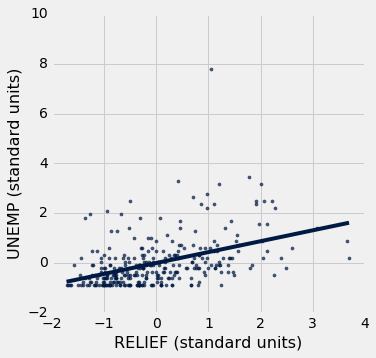

In [23]:
Table().with_columns([
    'UNEMP (standard units)',  standard_units(data.column('UNEMP')), 
    'RELIEF (standard units)', standard_units(data.column('RELIEF'))
]).scatter(-1,0, fit_line=True, s=10)

So, keep in mind that change happens over time, be mindful of what’s included and of what’s excluded, and of who’s doing the counting or recording, and, yes, try to note outliers.

Thank you!